In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import tensorflow as tf
#import keras
#from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler

## Link SAB features to ACS features

In [2]:
#Note: this file is not on the Github, so this notebook is effectively not runnable, just use resulting csv of interest
acs = pd.read_csv("nhgis.csv", sep=",", encoding='latin-1')

In [3]:
acs = acs.drop(['GISJOIN', 'YEAR', 'REGIONA', 'DIVISIONA', 'STATE', 'COUNTY', 'COUSUBA', 'PLACEA', 'NAME_E'], axis=1)

In [4]:
acs.STATEA = acs.STATEA.astype(str)
acs.COUNTYA = acs.COUNTYA.astype(str)
acs.TRACTA = acs.TRACTA.astype(str)
acs.BLKGRPA = acs.BLKGRPA.astype(str)

In [5]:
acs.STATEA = acs.STATEA.str.zfill(2)
acs.COUNTYA = acs.COUNTYA.str.zfill(3)
acs.TRACTA = acs.TRACTA.str.zfill(6)
#acs.BLKGRPA = acs.BLKGRPA.str.zfill(4)

In [6]:
acs.BLKGRPA = acs.STATEA + acs.COUNTYA + acs.TRACTA + acs.BLKGRPA

In [7]:
acs = acs.drop(['STATEA', 'COUNTYA', 'TRACTA'], axis=1)
acs = acs.rename(columns={'BLKGRPA': 'BLKGRP'})

In [8]:
#selected features of interest
acs = acs[['BLKGRP', 'AHY1E001', 'AHY2E001', 'AHY2E002', 'AHY2E003', 'AHY2E004', 'AHY2E005', 'AHY2E006', 'AHY2E007', 'AHY2E008', 'AHZBE001', 'AHZBE003', 'AHZUE001', 'AHZUE009', 'AHZUE015', 'AH04E001', 'AH04E017', 'AH04E018', 'AH04E022', 'AH04E023', 'AH04E024', 'AH04E025', 'AH1JE001', 'AH1JE002', 'AH1JE003', 'AH1JE004', 'AH1JE005', 'AH1JE006', 'AH1JE007', 'AH1JE008', 'AH1KE001', 'AH1KE002', 'AH1LE001', 'AH1PE001', 'AH19E001', 'AH19E002', 'AH19E003', 'AH3IE001', 'AH3IE002', 'AH3IE003', 'AH3IE004', 'AH3IE005', 'AH5RE001']]

In [9]:
relation = pd.read_excel("grf18_lea_blkgrp.xlsx")

In [10]:
relation = relation.rename(columns={'LEAID': 'district_id'})
relation.district_id = relation.district_id.astype(float)
relation = relation[['district_id', 'BLKGRP', 'LANDAREA']]

In [11]:
relation.BLKGRP = relation.BLKGRP.astype(str)
relation.BLKGRP = relation.BLKGRP.str.zfill(12)

In [12]:
demos = pd.read_csv("demos_clean.csv")
demos.drop(demos.columns[[0, 1, 2]], axis=1, inplace=True)

In [13]:
df1 = pd.merge(relation, demos, on='district_id', how='inner')

In [14]:
df1 = pd.merge(df1, acs, on='BLKGRP', how='inner')

In [15]:
df1_add = df1.copy()

In [16]:
df1 = df1.drop(['district_id', 'BLKGRP'], axis=1)

In [17]:
df1.shape

(2692331, 55)

In [21]:
df1['pop_density'] = df1.AHY1E001/df1.LANDAREA
cols = df1.columns.tolist()
cols = cols[1:] + cols[0:1]
df1 = df1[cols]

In [22]:
grouped = df1.groupby('school_id', sort=False)

In [23]:
f = lambda x: np.sum(x)
g = lambda x: np.mean(x)

In [24]:
#aggregate using mean
df2 = grouped.agg({'pct_native': g, 'pct_asian': g, 'pct_hispanic': g, 'pct_black': g,
       'pct_white': g, 'pct_pacisl': g, 'pct_mixed': g, 'total_race': f, 'free_lunch': g,
       'reduced_lunch': g, 'total': f, 'AHY1E001': f, 'AHY2E001': f, 'AHY2E002': g,
       'AHY2E003': g, 'AHY2E004': g, 'AHY2E005': g, 'AHY2E006': g, 'AHY2E007': g, 'AHY2E008': g,
       'AHZBE001': f, 'AHZBE003': g, 'AHZUE001': f, 'AHZUE009': g, 'AHZUE015': g, 'AH04E001': f,
       'AH04E017': g, 'AH04E018': g, 'AH04E022': g, 'AH04E023': g, 'AH04E024': g, 'AH04E025': g,
       'AH1JE001': f, 'AH1JE002': g, 'AH1JE003': g, 'AH1JE004': g, 'AH1JE005': g, 'AH1JE006': g,
       'AH1JE007': g, 'AH1JE008': g, 'AH1KE001': f, 'AH1KE002': g, 'AH1LE001': g, 'AH1PE001': g,
       'AH19E001': g, 'AH19E002': g, 'AH19E003': g, 'AH3IE001': g, 'AH3IE002': g, 'AH3IE003': g,
       'AH3IE004': g, 'AH3IE005': g, 'AH5RE001': g, 'pop_density': g, 'LANDAREA': f}).reset_index()

In [ ]:
df2.head()

In [ ]:
g = lambda x: np.average(x, weights=df1.loc[x.index, 'AHY1E001'])

In [ ]:
#aggregate using weighted mean
df3 = grouped.agg({'pct_native': g, 'pct_asian': g, 'pct_hispanic': g, 'pct_black': g,
       'pct_white': g, 'pct_pacisl': g, 'pct_mixed': g, 'total_race': f, 'free_lunch': g,
       'reduced_lunch': g, 'total': f, 'AHY1E001': f, 'AHY2E001': f, 'AHY2E002': g,
       'AHY2E003': g, 'AHY2E004': g, 'AHY2E005': g, 'AHY2E006': g, 'AHY2E007': g, 'AHY2E008': g,
       'AHZBE001': f, 'AHZBE003': g, 'AHZUE001': f, 'AHZUE009': g, 'AHZUE015': g, 'AH04E001': f,
       'AH04E017': g, 'AH04E018': g, 'AH04E022': g, 'AH04E023': g, 'AH04E024': g, 'AH04E025': g,
       'AH1JE001': f, 'AH1JE002': g, 'AH1JE003': g, 'AH1JE004': g, 'AH1JE005': g, 'AH1JE006': g,
       'AH1JE007': g, 'AH1JE008': g, 'AH1KE001': f, 'AH1KE002': g, 'AH1LE001': g, 'AH1PE001': g,
       'AH19E001': g, 'AH19E002': g, 'AH19E003': g, 'AH3IE001': g, 'AH3IE002': g, 'AH3IE003': g,
       'AH3IE004': g, 'AH3IE005': g, 'AH5RE001': g, 'pop_density': g, 'LANDAREA': f}).reset_index()

In [ ]:
df3.head()

In [ ]:
g = lambda x: np.median(x)

In [ ]:
#aggregate using median
df4 = grouped.agg({'pct_native': g, 'pct_asian': g, 'pct_hispanic': g, 'pct_black': g,
       'pct_white': g, 'pct_pacisl': g, 'pct_mixed': g, 'total_race': f, 'free_lunch': g,
       'reduced_lunch': g, 'total': f, 'AHY1E001': f, 'AHY2E001': f, 'AHY2E002': g,
       'AHY2E003': g, 'AHY2E004': g, 'AHY2E005': g, 'AHY2E006': g, 'AHY2E007': g, 'AHY2E008': g,
       'AHZBE001': f, 'AHZBE003': g, 'AHZUE001': f, 'AHZUE009': g, 'AHZUE015': g, 'AH04E001': f,
       'AH04E017': g, 'AH04E018': g, 'AH04E022': g, 'AH04E023': g, 'AH04E024': g, 'AH04E025': g,
       'AH1JE001': f, 'AH1JE002': g, 'AH1JE003': g, 'AH1JE004': g, 'AH1JE005': g, 'AH1JE006': g,
       'AH1JE007': g, 'AH1JE008': g, 'AH1KE001': f, 'AH1KE002': g, 'AH1LE001': g, 'AH1PE001': g,
       'AH19E001': g, 'AH19E002': g, 'AH19E003': g, 'AH3IE001': g, 'AH3IE002': g, 'AH3IE003': g,
       'AH3IE004': g, 'AH3IE005': g, 'AH5RE001': g, 'pop_density': g, 'LANDAREA': f}).reset_index()

In [ ]:
df4.head()

In [ ]:
df2 = df2[~df2.isin([np.inf, -np.inf]).any(1)]
df3 = df3[~df3.isin([np.inf, -np.inf]).any(1)]
df4 = df4[~df4.isin([np.inf, -np.inf]).any(1)]

In [ ]:
df2_m = df2.copy()
df3_m = df3.copy()
df4_m = df4.copy()

In [ ]:
#impute using median
for i in range(len(df2_m.columns)):
    df2_m.iloc[:, i] = df2_m.iloc[:, i].fillna(df2_m.iloc[:, i].median(skipna=True))
for i in range(len(df3_m.columns)):
    df3_m.iloc[:, i] = df3_m.iloc[:, i].fillna(df3_m.iloc[:, i].median(skipna=True))
for i in range(len(df4.columns)):
    df4_m.iloc[:, i] = df4_m.iloc[:, i].fillna(df4_m.iloc[:, i].median(skipna=True))

In [ ]:
#convert raw estimates to percentages
for df in [df2_m, df3_m, df4_m]:
    for i in range(14, 21):
        df.iloc[:, i] = df.iloc[:, i]/df.AHY2E001
    df.AHZBE003 = df.AHZBE003/df.AHZBE001
    df.AHZUE009 = df.AHZUE009/df.AHZUE001
    df.AHZUE015 = df.AHZUE015/df.AHZUE001
    for i in range(27, 33):
        df.iloc[:, i] = df.iloc[:, i]/df.AH04E001
    df.AH1KE002 = df.AH1KE002/df.AH1KE001
    df.AH19E002 = df.AH19E002/df.AH19E001
    df.AH19E003 = df.AH19E003/df.AH19E001
    for i in range(42, 47):
        df.iloc[:, i] = df.iloc[:, i]/df.AH3IE001

In [ ]:
#after calculating features as percentages, drop total columns
df2_m = df2_m.drop(['total_race', 'AHY2E001', 'AHZBE001', 'AHZUE001', 'AH04E001', 'AH1JE001', 'AH1KE001', 'AH19E001', 'AH3IE001'], axis=1)
df3_m = df3_m.drop(['total_race', 'AHY2E001', 'AHZBE001', 'AHZUE001', 'AH04E001', 'AH1JE001', 'AH1KE001', 'AH19E001', 'AH3IE001'], axis=1)
df4_m = df4_m.drop(['total_race', 'AHY2E001', 'AHZBE001', 'AHZUE001', 'AH04E001', 'AH1JE001', 'AH1KE001', 'AH19E001', 'AH3IE001'], axis=1)

## Merge achievement index data with base raw features

In [44]:
sw_achi = pd.read_csv("sw_achi.csv")
sw_achi.drop(sw_achi.columns[[0]], axis=1, inplace=True)

In [184]:
df5_m = pd.merge(df3_m, sw_achi, on='school_id', how='inner')
df6_m = pd.merge(df4_m, sw_achi, on='school_id', how='inner')

In [185]:
#save as csv's
df5_m.to_csv('rf_base_wmeanagg.csv')
df6_m.to_csv('rf_base_medianagg.csv')

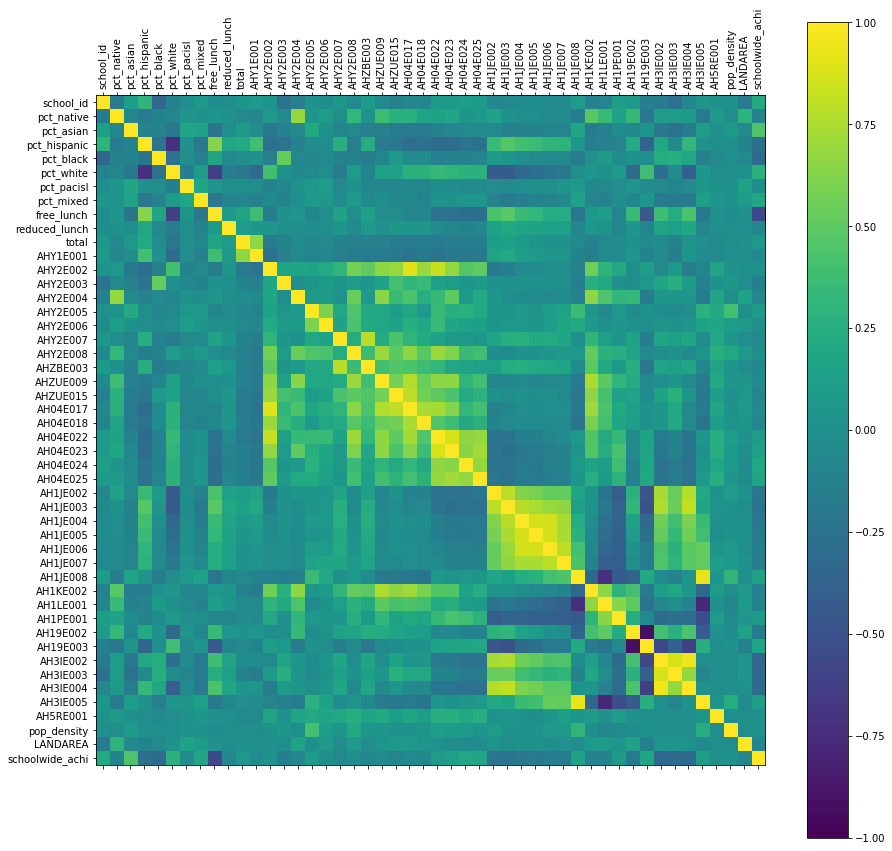

In [186]:
corr = df5_m.corr()
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
plt.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

In [187]:
corr['schoolwide_achi']

school_id          0.212389
pct_native        -0.105831
pct_asian          0.452951
pct_hispanic      -0.265326
pct_black         -0.290246
pct_white          0.283502
pct_pacisl        -0.030312
pct_mixed          0.185330
free_lunch        -0.559161
reduced_lunch     -0.072689
total              0.069397
AHY1E001          -0.038044
AHY2E002           0.020694
AHY2E003          -0.139634
AHY2E004          -0.070914
AHY2E005           0.091494
AHY2E006          -0.003652
AHY2E007          -0.043607
AHY2E008          -0.007385
AHZBE003          -0.066091
AHZUE009          -0.037488
AHZUE015          -0.087824
AH04E017          -0.050076
AH04E018          -0.069516
AH04E022           0.102465
AH04E023           0.127446
AH04E024           0.200350
AH04E025           0.170363
AH1JE002          -0.214043
AH1JE003          -0.237929
AH1JE004          -0.195914
AH1JE005          -0.181224
AH1JE006          -0.144948
AH1JE007          -0.157344
AH1JE008           0.149783
AH1KE002          -0

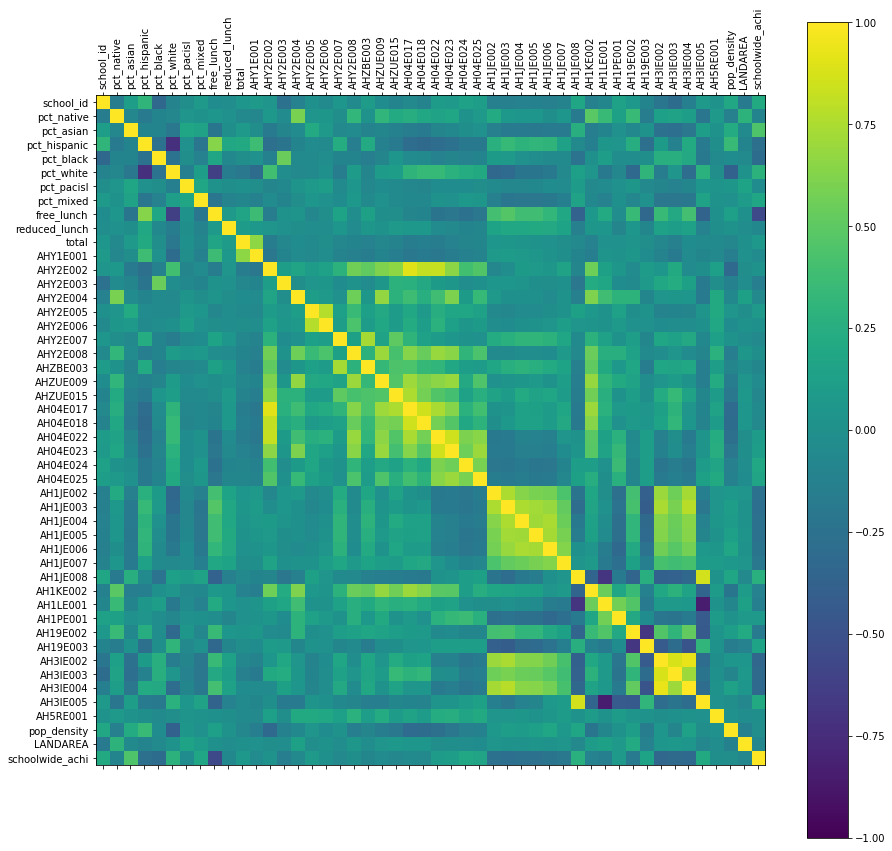

In [189]:
corr = df6_m.corr()
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
plt.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

In [190]:
corr['schoolwide_achi']

school_id          0.215278
pct_native        -0.101133
pct_asian          0.452482
pct_hispanic      -0.263634
pct_black         -0.289393
pct_white          0.283288
pct_pacisl        -0.027429
pct_mixed          0.185578
free_lunch        -0.557057
reduced_lunch     -0.063202
total              0.070176
AHY1E001          -0.034608
AHY2E002           0.023442
AHY2E003          -0.141283
AHY2E004          -0.057744
AHY2E005           0.077563
AHY2E006           0.003212
AHY2E007          -0.059245
AHY2E008          -0.005671
AHZBE003          -0.079676
AHZUE009          -0.033985
AHZUE015          -0.072060
AH04E017          -0.039409
AH04E018          -0.056730
AH04E022           0.103869
AH04E023           0.114514
AH04E024           0.201073
AH04E025           0.167542
AH1JE002          -0.244066
AH1JE003          -0.273024
AH1JE004          -0.247198
AH1JE005          -0.257446
AH1JE006          -0.231924
AH1JE007          -0.196957
AH1JE008           0.270204
AH1KE002          -0

## Add additional raw features (df2 from baseline)

In [25]:
grad = pd.read_csv("grad_clean.csv")
grad.drop(grad.columns[[0]], axis=1, inplace=True)
financials = pd.read_csv("financials_clean.csv")
financials.drop(financials.columns[[0]], axis=1, inplace=True)
df1_add = pd.merge(df1_add, grad, on='school_id', how='inner')
df1_add = pd.merge(df1_add, financials, on='district_id', how='inner')
df1_add = df1_add.drop(columns=['total_rev', 'total_locrev', 'pta_rev', 'prop_taxes', 'sales_taxes', 'public_utility_taxes', 'income_taxes', 'other_taxes'])
df1_add.total_salaries = df1_add.total_salaries/df1_add.total
df1_add.salaries_instruction = df1_add.salaries_instruction/df1_add.total
df1_add.salaries_teachers = df1_add.salaries_teachers/df1_add.total
df1_add = df1_add.rename(columns={'total_salaries': 'total_salaries_ps', 'salaries_instruction': 'salaries_instruction_ps', 'salaries_teachers': 'salaries_teachers_ps'})

In [26]:
df1_add = df1_add.drop(['district_id', 'BLKGRP'], axis=1)

In [27]:
df1_add['pop_density'] = df1_add.AHY1E001/df1_add.LANDAREA
cols = df1_add.columns.tolist()
cols = cols[1:13] + cols[55:65] + cols[13:55] + cols[65:] + cols[0:1]
df1_add = df1_add[cols]

In [28]:
df1_add.head()

,school_id,pct_native,pct_asian,pct_hispanic,pct_black,pct_white,pct_pacisl,pct_mixed,total_race,free_lunch,...,AH19E002,AH19E003,AH3IE001,AH3IE002,AH3IE003,AH3IE004,AH3IE005,AH5RE001,pop_density,LANDAREA
0,1.000050e+10,0.00219,0.006569,0.40146,0.027737,0.543796,0.00146,0.016788,1370.0,0.310949,...,8,819,827,137,85,52,690,575.0,37941.133888,0.049445
1,1.000050e+10,0.00219,0.006569,0.40146,0.027737,0.543796,0.00146,0.016788,1370.0,0.310949,...,7,605,612,163,51,112,449,577.0,805.683976,2.066567
2,1.000050e+10,0.00219,0.006569,0.40146,0.027737,0.543796,0.00146,0.016788,1370.0,0.310949,...,0,322,322,76,28,48,246,NaN,958.934800,0.800889
3,1.000050e+10,0.00219,0.006569,0.40146,0.027737,0.543796,0.00146,0.016788,1370.0,0.310949,...,3,371,374,47,7,40,327,676.0,1274.763145,0.852707
4,1.000050e+10,0.00219,0.006569,0.40146,0.027737,0.543796,0.00146,0.016788,1370.0,0.310949,...,8,541,549,137,66,71,412,680.0,801.004413,1.957542


In [29]:
grouped_add = df1_add.groupby('school_id', sort=False)

In [30]:
f = lambda x: np.sum(x)

In [31]:
g = lambda x: np.average(x, weights=df1_add.loc[x.index, 'AHY1E001'])

In [32]:
#aggregate using weighted mean
df7 = grouped_add.agg({'pct_native': g, 'pct_asian': g, 'pct_hispanic': g, 'pct_black': g,
       'pct_white': g, 'pct_pacisl': g, 'pct_mixed': g, 'total_race': f, 'free_lunch': g,
       'reduced_lunch': g, 'total': f, 'grad_rate_all': g, 'grad_rate_native' : g,
       'grad_rate_asian': g, 'grad_rate_black': g, 'grad_rate_hispanic': g,
       'grad_rate_mixed': g, 'grad_rate_linc': g, 'total_salaries_ps': g, 'salaries_instruction_ps': g, 'salaries_teachers_ps': g,
       'AHY1E001': f, 'AHY2E001': f, 'AHY2E002': g, 'AHY2E003': g, 'AHY2E004': g, 'AHY2E005': g, 
       'AHY2E006': g, 'AHY2E007': g, 'AHY2E008': g, 'AHZBE001': f, 'AHZBE003': g, 'AHZUE001': f, 
       'AHZUE009': g, 'AHZUE015': g, 'AH04E001': f, 'AH04E017': g, 'AH04E018': g, 'AH04E022': g, 
       'AH04E023': g, 'AH04E024': g, 'AH04E025': g, 'AH1JE001': f, 'AH1JE002': g, 'AH1JE003': g, 
       'AH1JE004': g, 'AH1JE005': g, 'AH1JE006': g, 'AH1JE007': g, 'AH1JE008': g, 'AH1KE001': f, 
       'AH1KE002': g, 'AH1LE001': g, 'AH1PE001': g, 'AH19E001': g, 'AH19E002': g, 'AH19E003': g, 
       'AH3IE001': g, 'AH3IE002': g, 'AH3IE003': g, 'AH3IE004': g, 'AH3IE005': g, 'AH5RE001': g, 
       'pop_density': g, 'LANDAREA': f, }).reset_index()

In [33]:
df7.head()

,school_id,pct_native,pct_asian,pct_hispanic,pct_black,pct_white,pct_pacisl,pct_mixed,total_race,free_lunch,...,AH19E002,AH19E003,AH3IE001,AH3IE002,AH3IE003,AH3IE004,AH3IE005,AH5RE001,pop_density,LANDAREA
0,1.000050e+10,0.002190,0.006569,0.401460,0.027737,0.543796,0.001460,0.016788,27400.0,0.310949,...,10.436104,691.237418,701.673522,143.903332,42.656630,101.246703,557.770190,NaN,1.061330e+04,26.779523
1,1.000060e+10,0.000000,0.002933,0.043988,0.020528,0.926686,0.000000,0.005865,19096.0,0.563050,...,8.063868,629.721394,637.785262,101.911544,39.590674,62.320870,535.873718,NaN,inf,488.942901
2,1.000060e+10,0.016639,0.004992,0.277870,0.011647,0.687188,0.000000,0.001664,33656.0,0.623960,...,8.063868,629.721394,637.785262,101.911544,39.590674,62.320870,535.873718,NaN,inf,488.942901
3,1.000060e+10,0.004386,0.004386,0.019737,0.010965,0.953947,0.000000,0.006579,25536.0,0.381579,...,8.063868,629.721394,637.785262,101.911544,39.590674,62.320870,535.873718,NaN,inf,488.942901
4,1.016900e+10,0.003289,0.011513,0.078947,0.078947,0.794408,0.001645,0.031250,9728.0,0.328947,...,6.462251,596.079737,602.541987,92.068405,44.571284,47.497121,510.473582,NaN,1.214025e+04,25.386423


In [34]:
g = lambda x: np.median(x)

In [35]:
#aggregate using median
df8 = grouped_add.agg({'pct_native': g, 'pct_asian': g, 'pct_hispanic': g, 'pct_black': g,
       'pct_white': g, 'pct_pacisl': g, 'pct_mixed': g, 'total_race': f, 'free_lunch': g,
       'reduced_lunch': g, 'total': f, 'grad_rate_all': g, 'grad_rate_native' : g,
       'grad_rate_asian': g, 'grad_rate_black': g, 'grad_rate_hispanic': g,
       'grad_rate_mixed': g, 'grad_rate_linc': g, 'total_salaries_ps': g, 'salaries_instruction_ps': g, 'salaries_teachers_ps': g,
       'AHY1E001': f, 'AHY2E001': f, 'AHY2E002': g, 'AHY2E003': g, 'AHY2E004': g, 'AHY2E005': g, 
       'AHY2E006': g, 'AHY2E007': g, 'AHY2E008': g, 'AHZBE001': f, 'AHZBE003': g, 'AHZUE001': f, 
       'AHZUE009': g, 'AHZUE015': g, 'AH04E001': f, 'AH04E017': g, 'AH04E018': g, 'AH04E022': g, 
       'AH04E023': g, 'AH04E024': g, 'AH04E025': g, 'AH1JE001': f, 'AH1JE002': g, 'AH1JE003': g, 
       'AH1JE004': g, 'AH1JE005': g, 'AH1JE006': g, 'AH1JE007': g, 'AH1JE008': g, 'AH1KE001': f, 
       'AH1KE002': g, 'AH1LE001': g, 'AH1PE001': g, 'AH19E001': g, 'AH19E002': g, 'AH19E003': g, 
       'AH3IE001': g, 'AH3IE002': g, 'AH3IE003': g, 'AH3IE004': g, 'AH3IE005': g, 'AH5RE001': g, 
       'pop_density': g, 'LANDAREA': f, }).reset_index()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [36]:
df8.head()

,school_id,pct_native,pct_asian,pct_hispanic,pct_black,pct_white,pct_pacisl,pct_mixed,total_race,free_lunch,...,AH19E002,AH19E003,AH3IE001,AH3IE002,AH3IE003,AH3IE004,AH3IE005,AH5RE001,pop_density,LANDAREA
0,1.000050e+10,0.002190,0.006569,0.401460,0.027737,0.543796,0.001460,0.016788,27400.0,0.310949,...,1.5,585.0,588.5,94.0,28.5,62.0,434.5,NaN,1200.014763,26.779523
1,1.000060e+10,0.000000,0.002933,0.043988,0.020528,0.926686,0.000000,0.005865,19096.0,0.563050,...,0.0,512.0,512.0,68.5,27.5,40.0,433.0,NaN,212.978547,488.942901
2,1.000060e+10,0.016639,0.004992,0.277870,0.011647,0.687188,0.000000,0.001664,33656.0,0.623960,...,0.0,512.0,512.0,68.5,27.5,40.0,433.0,NaN,212.978547,488.942901
3,1.000060e+10,0.004386,0.004386,0.019737,0.010965,0.953947,0.000000,0.006579,25536.0,0.381579,...,0.0,512.0,512.0,68.5,27.5,40.0,433.0,NaN,212.978547,488.942901
4,1.016900e+10,0.003289,0.011513,0.078947,0.078947,0.794408,0.001645,0.031250,9728.0,0.328947,...,2.5,502.0,502.0,81.0,45.0,47.5,404.0,NaN,1141.778138,25.386423


In [37]:
df7 = df7[~df7.isin([np.inf, -np.inf]).any(1)]
df8 = df8[~df8.isin([np.inf, -np.inf]).any(1)]

In [38]:
df7_m = df7.copy()
df8_m = df8.copy()

In [39]:
#impute using median
for i in range(len(df7_m.columns)):
    df7_m.iloc[:, i] = df7_m.iloc[:, i].fillna(df7_m.iloc[:, i].median(skipna=True))
for i in range(len(df8.columns)):
    df8_m.iloc[:, i] = df8_m.iloc[:, i].fillna(df8_m.iloc[:, i].median(skipna=True))

In [40]:
[(df7_m.columns.get_loc(c), c) for c in df7_m.columns]

[(0, 'school_id'),
 (1, 'pct_native'),
 (2, 'pct_asian'),
 (3, 'pct_hispanic'),
 (4, 'pct_black'),
 (5, 'pct_white'),
 (6, 'pct_pacisl'),
 (7, 'pct_mixed'),
 (8, 'total_race'),
 (9, 'free_lunch'),
 (10, 'reduced_lunch'),
 (11, 'total'),
 (12, 'grad_rate_all'),
 (13, 'grad_rate_native'),
 (14, 'grad_rate_asian'),
 (15, 'grad_rate_black'),
 (16, 'grad_rate_hispanic'),
 (17, 'grad_rate_mixed'),
 (18, 'grad_rate_linc'),
 (19, 'total_salaries_ps'),
 (20, 'salaries_instruction_ps'),
 (21, 'salaries_teachers_ps'),
 (22, 'AHY1E001'),
 (23, 'AHY2E001'),
 (24, 'AHY2E002'),
 (25, 'AHY2E003'),
 (26, 'AHY2E004'),
 (27, 'AHY2E005'),
 (28, 'AHY2E006'),
 (29, 'AHY2E007'),
 (30, 'AHY2E008'),
 (31, 'AHZBE001'),
 (32, 'AHZBE003'),
 (33, 'AHZUE001'),
 (34, 'AHZUE009'),
 (35, 'AHZUE015'),
 (36, 'AH04E001'),
 (37, 'AH04E017'),
 (38, 'AH04E018'),
 (39, 'AH04E022'),
 (40, 'AH04E023'),
 (41, 'AH04E024'),
 (42, 'AH04E025'),
 (43, 'AH1JE001'),
 (44, 'AH1JE002'),
 (45, 'AH1JE003'),
 (46, 'AH1JE004'),
 (47, 'AH1JE

In [41]:
#convert raw estimates to percentages
for df in [df7_m, df8_m]:
    for i in range(24, 31):
        df.iloc[:, i] = df.iloc[:, i]/df.AHY2E001
    df.AHZBE003 = df.AHZBE003/df.AHZBE001
    df.AHZUE009 = df.AHZUE009/df.AHZUE001
    df.AHZUE015 = df.AHZUE015/df.AHZUE001
    for i in range(37, 43):
        df.iloc[:, i] = df.iloc[:, i]/df.AH04E001
    df.AH1KE001 = df.AH1KE001/df.AH1KE002
    df.AH19E002 = df.AH19E002/df.AH19E001
    df.AH19E003 = df.AH19E003/df.AH19E001
    for i in range(59, 63):
        df.iloc[:, i] = df.iloc[:, i]/df.AH3IE001

In [42]:
#after calculating features as percentages, drop total columns
df7_m = df7_m.drop(['total_race', 'AHY2E001', 'AHZBE001', 'AHZUE001', 'AH04E001', 'AH1JE001', 'AH1KE001', 'AH19E001', 'AH3IE001'], axis=1)
df8_m = df8_m.drop(['total_race', 'AHY2E001', 'AHZBE001', 'AHZUE001', 'AH04E001', 'AH1JE001', 'AH1KE001', 'AH19E001', 'AH3IE001'], axis=1)

## Merge achievement index data with additional raw features

In [45]:
df9 = pd.merge(df7_m, sw_achi, on='school_id', how='inner')
df10 = pd.merge(df8_m, sw_achi, on='school_id', how='inner')

In [46]:
#save as csv's
df9.to_csv('rf_add_wmeanagg.csv')
df10.to_csv('rf_add_medianagg.csv')

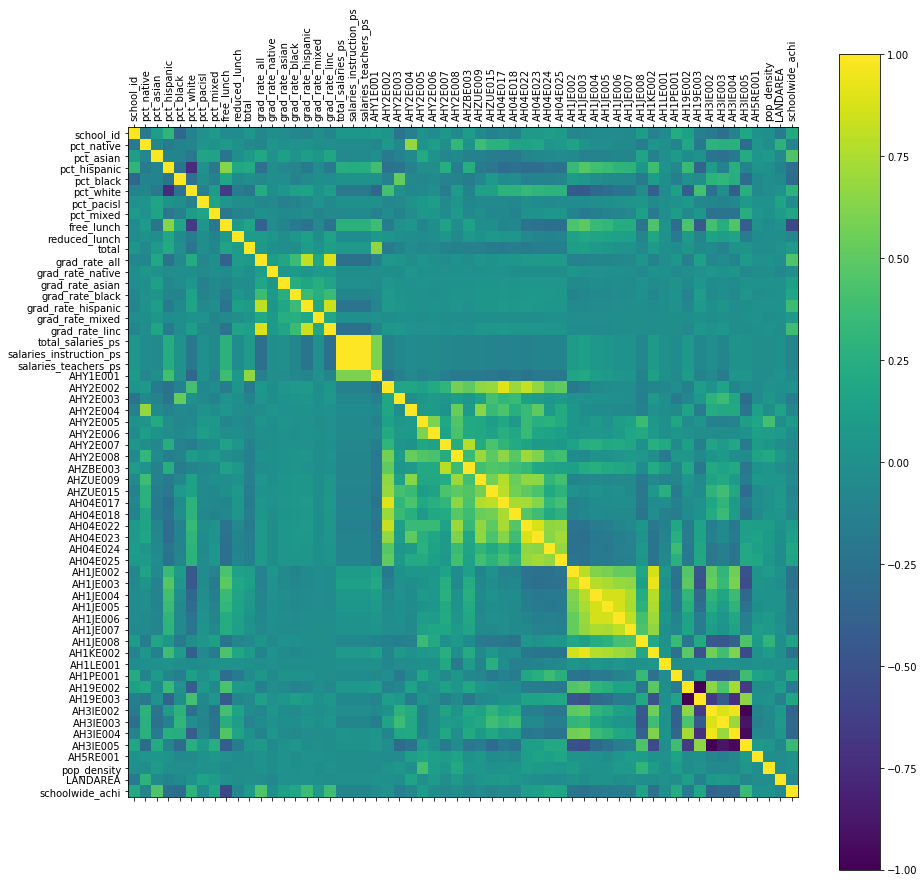

In [92]:
corr = df9.corr()
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
plt.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

In [85]:
corr['schoolwide_achi']

school_id                  0.213669
pct_native                -0.105446
pct_asian                  0.452890
pct_hispanic              -0.269343
pct_black                 -0.290830
pct_white                  0.293418
pct_pacisl                -0.031894
pct_mixed                  0.183533
free_lunch                -0.562675
reduced_lunch             -0.075631
total                      0.070397
grad_rate_all              0.452412
grad_rate_native          -0.007219
grad_rate_asian            0.136157
grad_rate_black            0.175908
grad_rate_hispanic         0.369970
grad_rate_mixed            0.072635
grad_rate_linc             0.377330
total_salaries_ps         -0.085078
salaries_instruction_ps   -0.084750
salaries_teachers_ps      -0.084587
AHY1E001                  -0.037996
AHY2E002                   0.019631
AHY2E003                  -0.139862
AHY2E004                  -0.070980
AHY2E005                   0.090369
AHY2E006                  -0.003577
AHY2E007                  -0

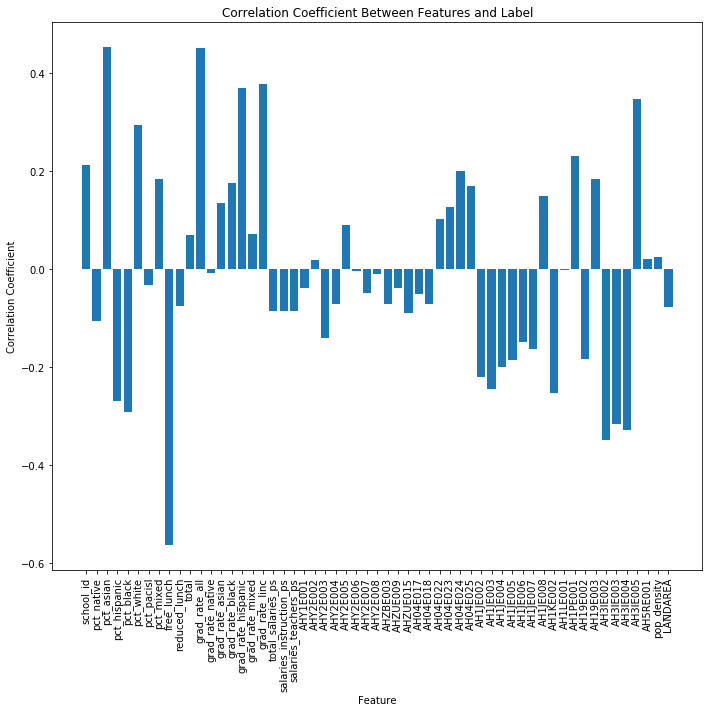

In [93]:
fig = plt.figure(figsize=(10,10))
plt.title("Correlation Coefficient Between Features and Label")
plt.bar(corr.columns.tolist()[:-1], corr['schoolwide_achi'][:-1]) 
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

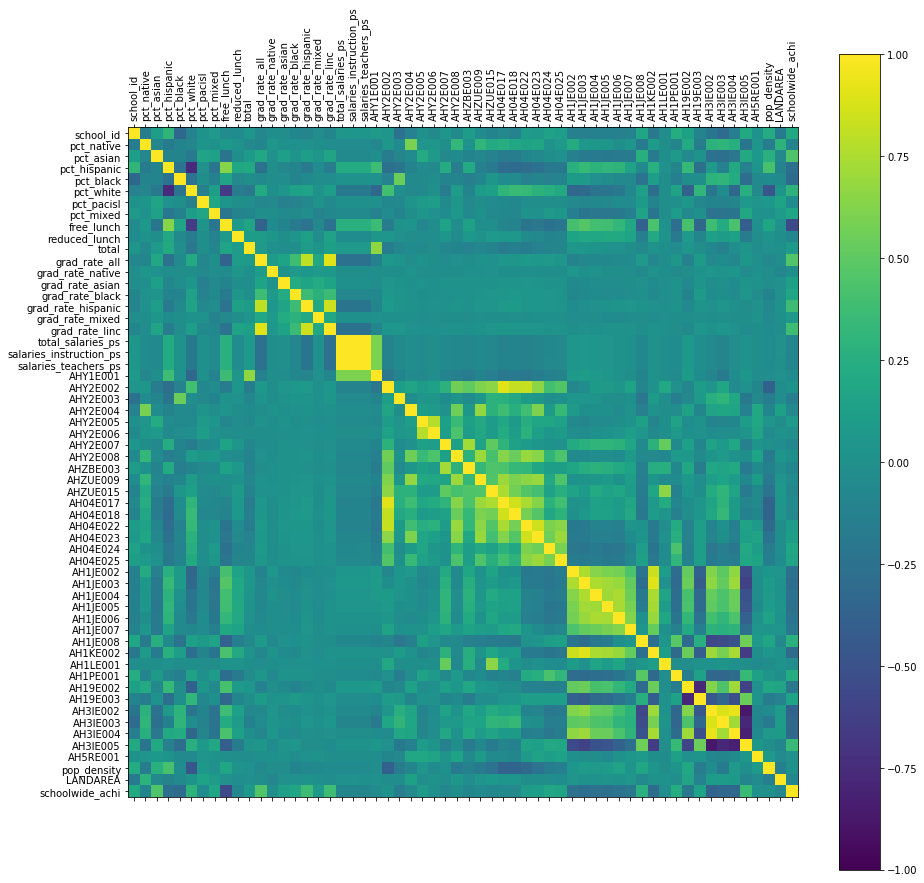

In [87]:
corr = df10.corr()
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
plt.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

In [55]:
fig.savefig('corr_matrix.png')

In [88]:
corr['schoolwide_achi']

school_id                  0.216486
pct_native                -0.101172
pct_asian                  0.452767
pct_hispanic              -0.267418
pct_black                 -0.290027
pct_white                  0.292779
pct_pacisl                -0.028690
pct_mixed                  0.184174
free_lunch                -0.560601
reduced_lunch             -0.066058
total                      0.071168
grad_rate_all              0.453230
grad_rate_native          -0.007231
grad_rate_asian            0.130925
grad_rate_black            0.177138
grad_rate_hispanic         0.372248
grad_rate_mixed            0.072926
grad_rate_linc             0.378879
total_salaries_ps         -0.082139
salaries_instruction_ps   -0.081877
salaries_teachers_ps      -0.081704
AHY1E001                  -0.034608
AHY2E002                   0.023249
AHY2E003                  -0.141192
AHY2E004                  -0.057728
AHY2E005                   0.077375
AHY2E006                   0.003324
AHY2E007                  -0

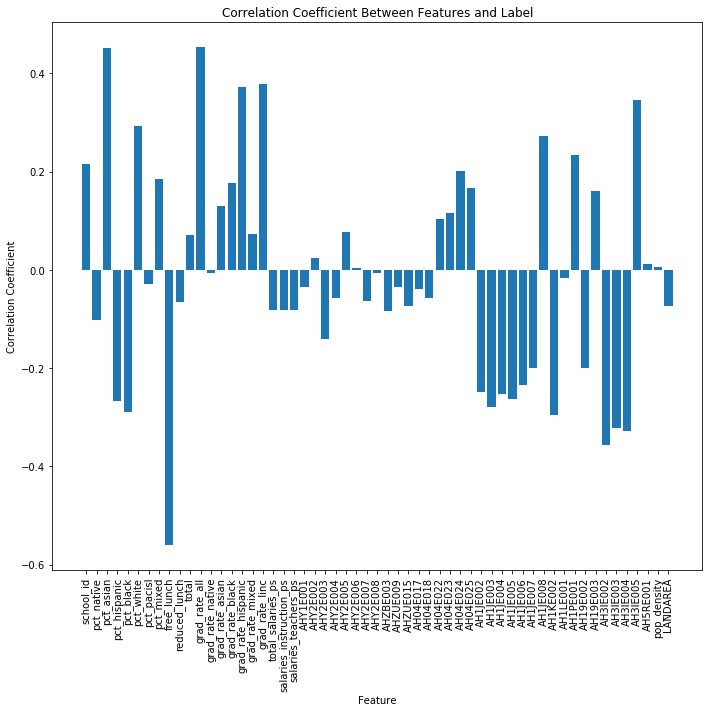

In [90]:
fig = plt.figure(figsize=(10,10))
plt.title("Correlation Coefficient Between Features and Label")
plt.bar(corr.columns.tolist()[:-1], corr['schoolwide_achi'][:-1]) 
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

In [91]:
fig.savefig('corr_bar.png')

## Add processed features

In [340]:
df11 = df7_m.copy()
df12 = df8_m.copy()

In [341]:
df11.columns

Index(['school_id', 'pct_native', 'pct_asian', 'pct_hispanic', 'pct_black',
       'pct_white', 'pct_pacisl', 'pct_mixed', 'free_lunch', 'reduced_lunch',
       'total', 'grad_rate_all', 'grad_rate_native', 'grad_rate_asian',
       'grad_rate_black', 'grad_rate_hispanic', 'grad_rate_mixed',
       'grad_rate_linc', 'total_salaries_ps', 'salaries_instruction_ps',
       'salaries_teachers_ps', 'AHY1E001', 'AHY2E002', 'AHY2E003', 'AHY2E004',
       'AHY2E005', 'AHY2E006', 'AHY2E007', 'AHY2E008', 'AHZBE003', 'AHZUE009',
       'AHZUE015', 'AH04E017', 'AH04E018', 'AH04E022', 'AH04E023', 'AH04E024',
       'AH04E025', 'AH1JE002', 'AH1JE003', 'AH1JE004', 'AH1JE005', 'AH1JE006',
       'AH1JE007', 'AH1JE008', 'AH1KE002', 'AH1LE001', 'AH1PE001', 'AH19E002',
       'AH19E003', 'AH3IE002', 'AH3IE003', 'AH3IE004', 'AH3IE005', 'AH5RE001',
       'pop_density', 'LANDAREA'],
      dtype='object')

In [342]:
for df in [df11, df12]:
    df['r_native'] = df.pct_native/df.AHY2E004
    df['r_asian'] = df.pct_asian/df.AHY2E005
    df['r_hispanic'] = df.pct_hispanic/df11.AHZBE003
    df['r_black'] = df.pct_black/df.AHY2E003
    df['r_white'] = df.pct_white/df.AHY2E002
    df['r_pacisl'] = df.pct_pacisl/df.AHY2E006
    df['r_mixed'] = df.pct_mixed/df.AHY2E008
    df['r_foodassist'] = df.free_lunch/df.AH3IE002

## Merge achievement index data with processed features

In [343]:
df13 = pd.merge(df11, sw_achi, on='school_id', how='inner')
df14 = pd.merge(df12, sw_achi, on='school_id', how='inner')

In [344]:
#save as csv's
df13.to_csv('pf_wmeanagg.csv')
df14.to_csv('pf_medianagg.csv')

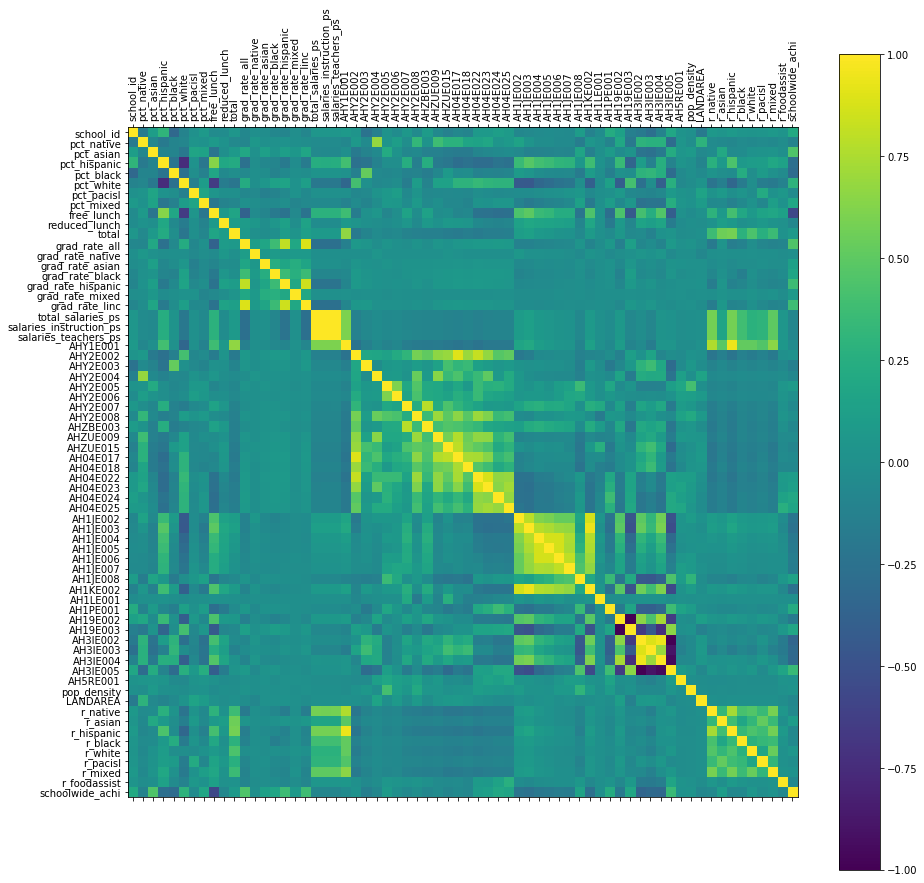

In [345]:
corr = df13.corr()
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
plt.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

In [346]:
corr['schoolwide_achi']

school_id                  0.213669
pct_native                -0.105446
pct_asian                  0.452890
pct_hispanic              -0.269343
pct_black                 -0.290830
pct_white                  0.293418
pct_pacisl                -0.031894
pct_mixed                  0.183533
free_lunch                -0.562675
reduced_lunch             -0.075631
total                      0.070397
grad_rate_all              0.452412
grad_rate_native          -0.007219
grad_rate_asian            0.136157
grad_rate_black            0.175908
grad_rate_hispanic         0.369970
grad_rate_mixed            0.072635
grad_rate_linc             0.377330
total_salaries_ps         -0.085078
salaries_instruction_ps   -0.084750
salaries_teachers_ps      -0.084587
AHY1E001                  -0.037996
AHY2E002                   0.019631
AHY2E003                  -0.139862
AHY2E004                  -0.070980
AHY2E005                   0.090369
AHY2E006                  -0.003577
AHY2E007                  -0

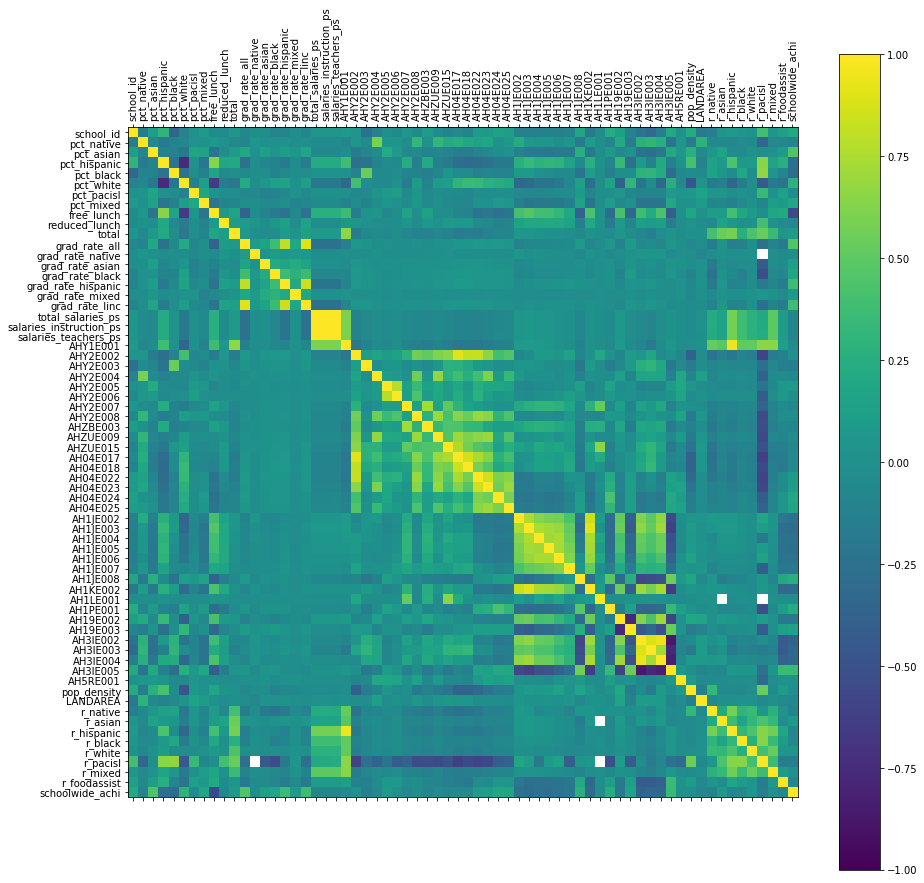

In [347]:
corr = df14.corr()
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
plt.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

In [348]:
pd.set_option('display.max_rows', None)
corr['schoolwide_achi']

school_id                  0.216486
pct_native                -0.101172
pct_asian                  0.452767
pct_hispanic              -0.267418
pct_black                 -0.290027
pct_white                  0.292779
pct_pacisl                -0.028690
pct_mixed                  0.184174
free_lunch                -0.560601
reduced_lunch             -0.066058
total                      0.071168
grad_rate_all              0.453230
grad_rate_native          -0.007231
grad_rate_asian            0.130925
grad_rate_black            0.177138
grad_rate_hispanic         0.372248
grad_rate_mixed            0.072926
grad_rate_linc             0.378879
total_salaries_ps         -0.082139
salaries_instruction_ps   -0.081877
salaries_teachers_ps      -0.081704
AHY1E001                  -0.034608
AHY2E002                   0.023249
AHY2E003                  -0.141192
AHY2E004                  -0.057728
AHY2E005                   0.077375
AHY2E006                   0.003324
AHY2E007                  -0